In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

init_notebook_mode(connected=True)
%matplotlib inline

sns.set_theme(style="whitegrid")

In [2]:
cf.go_offline()

# Dataset Information   
### Context
Food Preference Survey 2019

### Content
This Survey was conducted among participants from different countries and demography. I chose this dataset to practice data pre-processing, feature engineering, analysis and visualization.

It contains 288 unique responses.   
Source: __[Kaggle](https://www.kaggle.com/vijayashreer/food-preferences)__ 

In [3]:
df = pd.read_csv('Food Preference/Food_Preference.csv')

In [4]:
df.head()

,Timestamp,Participant_ID,Gender,Nationality,Age,Food,Juice,Dessert
0,2019/05/07 2:59:13 PM GMT+8,FPS001,Male,Indian,24,Traditional food,Fresh Juice,Maybe
1,2019/05/07 2:59:45 PM GMT+8,FPS002,Female,Indian,22,Western Food,Carbonated drinks,Yes
2,2019/05/07 3:00:05 PM GMT+8,FPS003,Male,Indian,31,Western Food,Fresh Juice,Maybe
3,2019/05/07 3:00:11 PM GMT+8,FPS004,Female,Indian,25,Traditional food,Fresh Juice,Maybe
4,2019/05/07 3:02:50 PM GMT+8,FPS005,Male,Indian,27,Traditional food,Fresh Juice,Maybe


The dataset had the Timestamp as a string so I went ahead and transformed it in a datetime object using a Pandas method.

In [5]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype                                 
---  ------          --------------  -----                                 
 0   Timestamp       288 non-null    datetime64[ns, pytz.FixedOffset(-480)]
 1   Participant_ID  288 non-null    object                                
 2   Gender          284 non-null    object                                
 3   Nationality     288 non-null    object                                
 4   Age             288 non-null    int64                                 
 5   Food            288 non-null    object                                
 6   Juice           288 non-null    object                                
 7   Dessert         288 non-null    object                                
dtypes: datetime64[ns, pytz.FixedOffset(-480)](1), int64(1), object(6)
memory usage: 18.1+ KB


Let's have a quick look at the number of respondents by gender. We can see that we have a higher number of Females who took this survey.

Text(0.5, 1.0, 'Distribution per Gender')

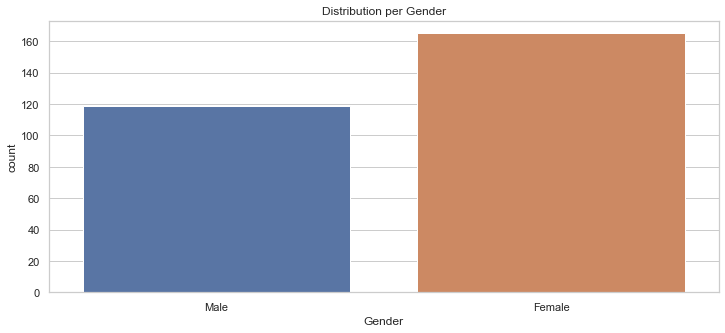

In [7]:
plt.figure(figsize=(12,5))
sns.countplot(x='Gender', data=df)
plt.title("Distribution per Gender")

I noticed that there were a few Nationalities but I wanted to see the count of top 3, and group the rest in a "Other" category as there were a lot of singular entries and with typos also.

In [8]:
df['Nationality'].value_counts()

Indian         241
Malaysian       10
Indonesia        7
Pakistani        3
Pakistani        2
Maldivian        2
MY               2
Japan            2
Yemen            1
China            1
Indonesian       1
Mauritian        1
Pakistan         1
Malaysia         1
Nigerian         1
MALAYSIAN        1
Malaysian        1
Muslim           1
Malaysia         1
Canadian         1
Seychellois      1
Indonesain       1
Maldivian        1
Algerian         1
Korean           1
Indonesian       1
Tanzanian        1
Name: Nationality, dtype: int64

In [9]:
s = df['Nationality'].value_counts()
out = s.iloc[:3]
out.loc['Other'] = s.iloc[3:].sum()
top4 = df
top4 = out.reset_index()
top4.columns=['Nationality', 'count']
top4

,Nationality,count
0,Indian,241
1,Malaysian,10
2,Indonesia,7
3,Other,30


After doing all of this work my brain said: "Hey...what about correcting the typos and making this column look better? This seems like the better approach no ?". So, this is what I did.  
Plus I plotted the values on a bar plot.

In [10]:
def correct_nat(x):
    if x[:5].lower() == 'malay':
        return "Malaysian"
    elif x[:5].lower() == 'indon':
        return "Indonesian"
    elif x[:5].lower() == 'pakis':
        return "Pakistani"
    elif x[:5].lower() == 'maldi':
        return "Maldivian"
    else:
        return x

In [11]:
df['Nationality'] = df['Nationality'].apply(correct_nat)

Text(0.5, 1.0, 'Distribution per Nationality')

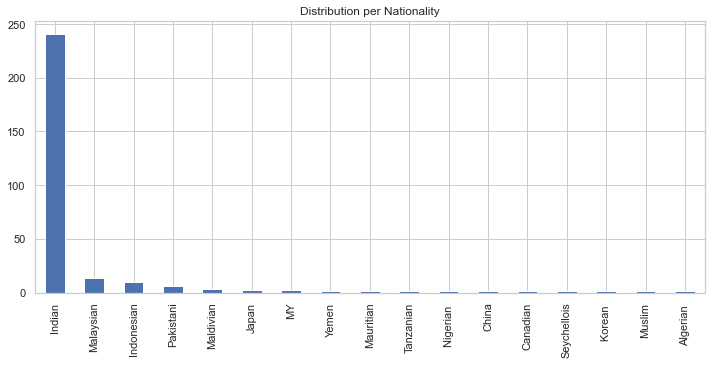

In [12]:
plt.figure(figsize=(12,5))
df['Nationality'].value_counts().plot(kind='bar')
plt.title("Distribution per Nationality")

***
Let's have a look at the distribution of Age per Gender of the survey respondants. We can see that the __age majority__ is between 19 and 40. We do not see a real pattern for the gender and age as it seems that the selection of people was random. 

Text(0.5, 1.0, 'Distribution per Age and Gender')

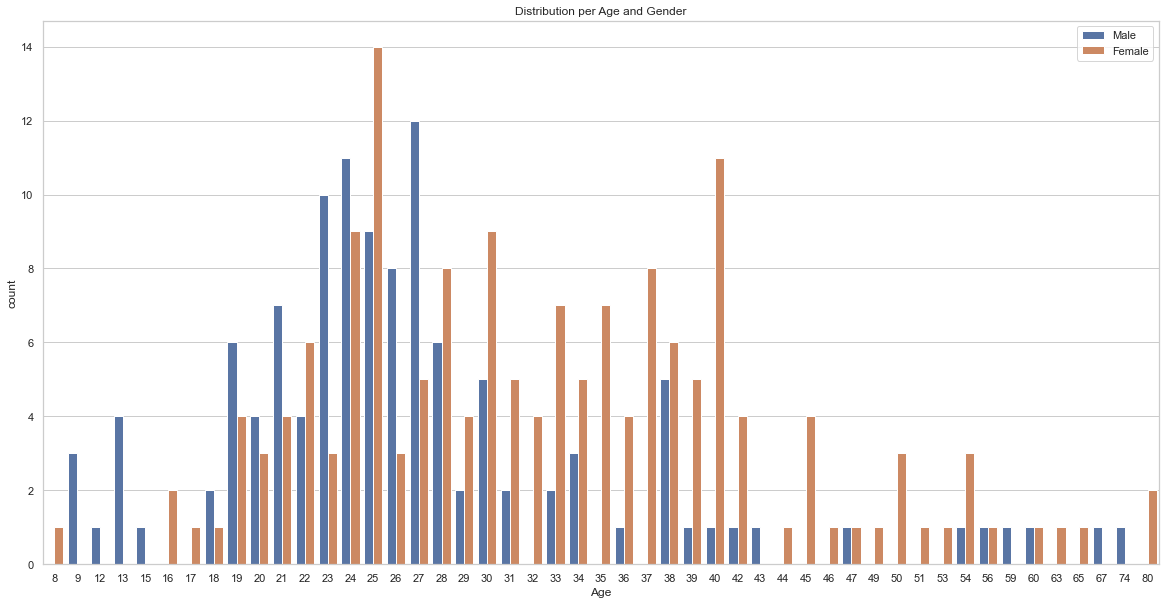

In [13]:
plt.figure(figsize=(20,10))
sns.countplot(x='Age', hue='Gender', data=df)
plt.legend(loc='upper right')
plt.title("Distribution per Age and Gender")

People were asked what do they prefer between their __Traditional Food and Western Food__, so here we have this distrubution per gender.   

We can see that most of them prefer their Traditional Food, more Females choosing this answer.

Text(0.5, 1.0, 'Distribution per Food Type and Gender')

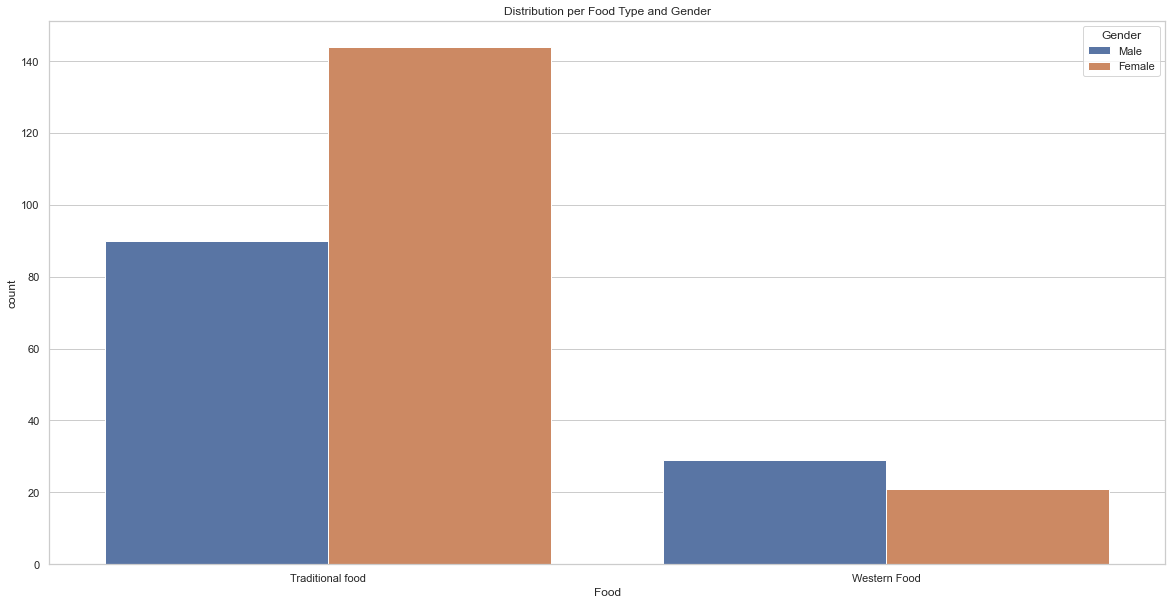

In [14]:
plt.figure(figsize=(20,10))
sns.countplot(x='Food', hue='Gender', data=df)
plt.title("Distribution per Food Type and Gender")

For the Juice preference, from the 2 options __'Fresh Juice' and 'Carbonated Drinks'__ we see a similar distribution as the plot above, where the majority prefers the 'Fresh Juice' option instead of the second. 

Text(0.5, 1.0, 'Distribution per Juice Type and Gender')

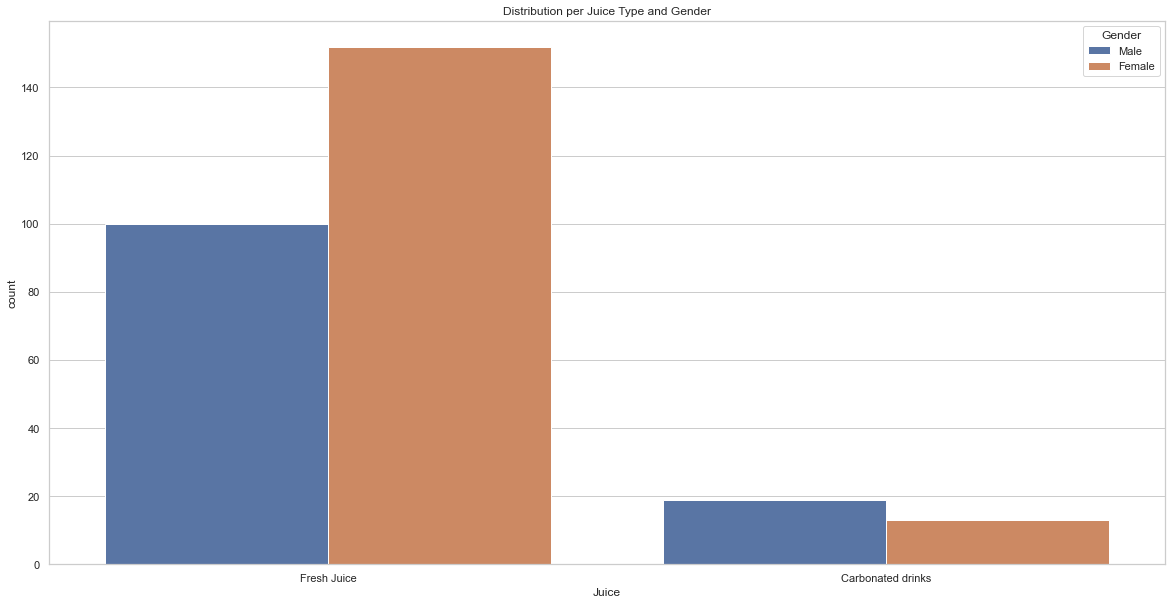

In [15]:
plt.figure(figsize=(20,10))
sns.countplot(x='Juice', hue='Gender', data=df)
plt.title("Distribution per Juice Type and Gender")

***
Keeping on the same context, I wanted to see the people that chose each type of __food__, what __juice__ preference they have.  
We can see clearly that those who like 'Traditional Food' prefer also 'Fresh Juice'.  

Text(0.5, 1.0, 'Distribution per Food Type and Juice Type')

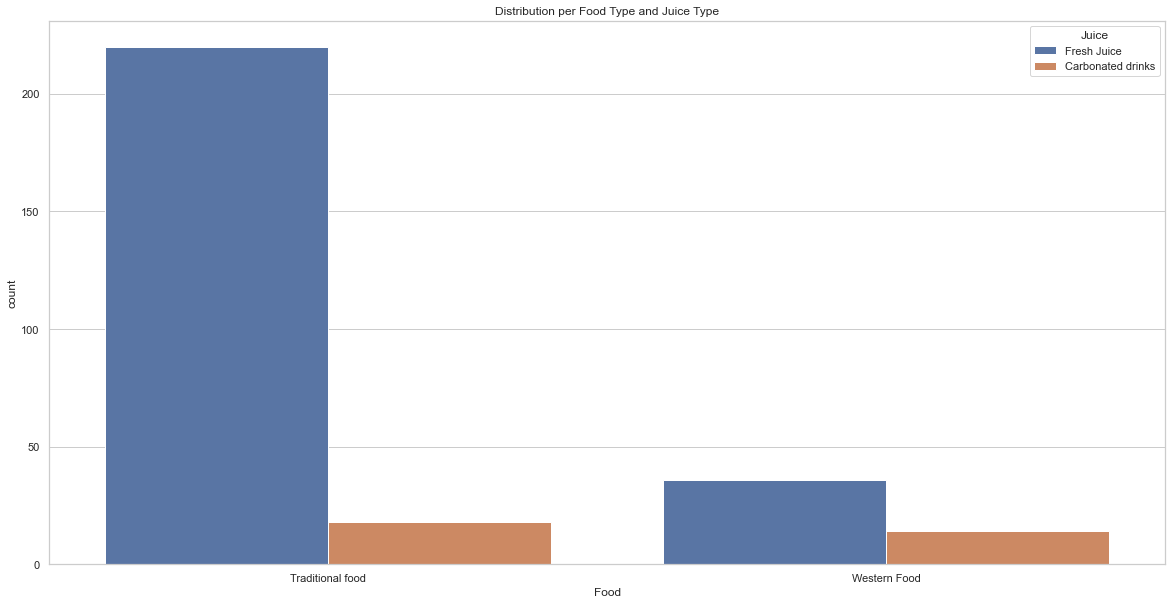

In [16]:
plt.figure(figsize=(20,10))
sns.countplot(x='Food', hue='Juice', data=df)
plt.title("Distribution per Food Type and Juice Type")

What about __Dessert__ ? Well, the chart is telling us that __most of them are undecided__, followed by those that can say 'Yes', and a few that seem to not prefer so much. Also, I included the distribution per Gender to have a better understanding.

Text(0.5, 1.0, 'Distribution per Dessert prefference and Gender')

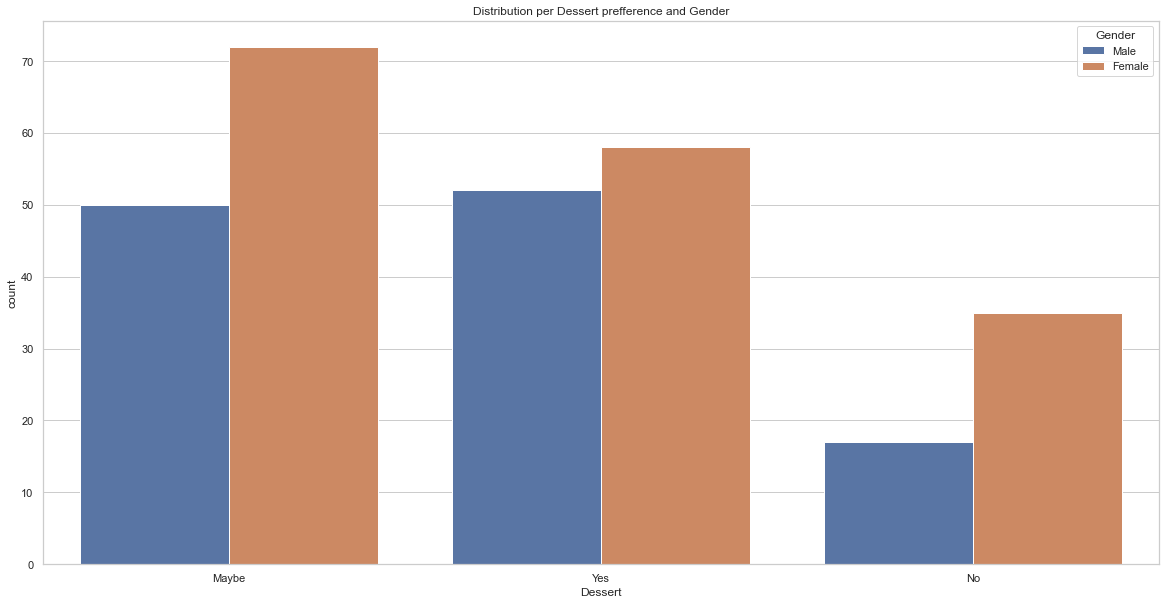

In [17]:
plt.figure(figsize=(20,10))
sns.countplot(x='Dessert', hue='Gender', data=df)
plt.title("Distribution per Dessert prefference and Gender")

***
Next 3 plots I just wanted to show for each __Nationality__ their __preferences__ for __"Food", "Juice Type"__ and if they would like __"Dessert"__.

Text(0.5, 1.0, 'Distribution per Nationality and Food Type')

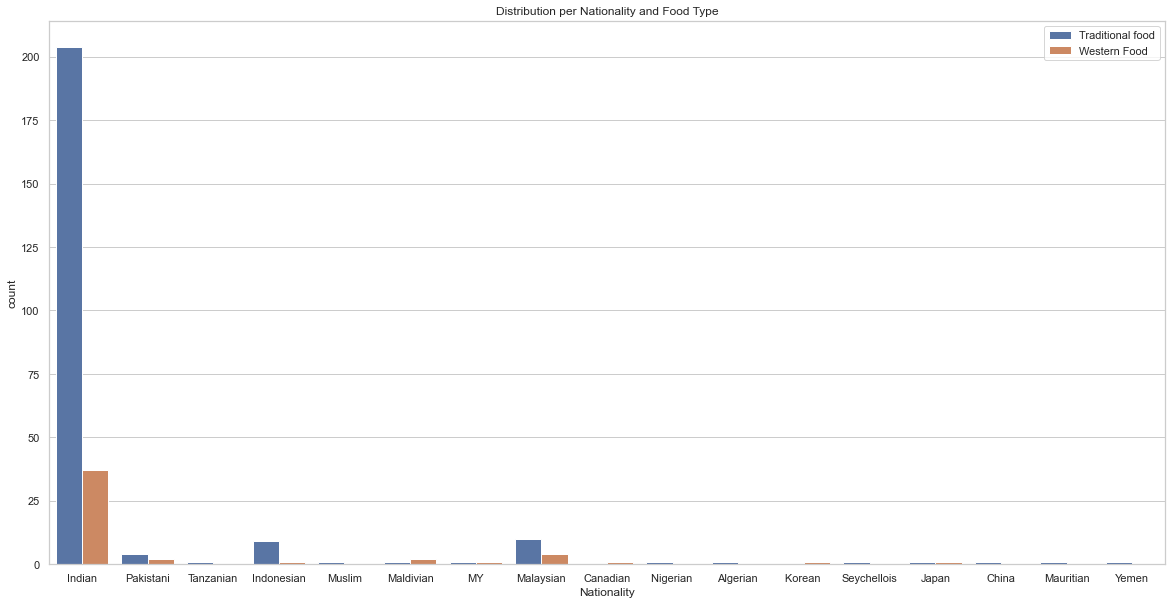

In [18]:
plt.figure(figsize=(20,10))
sns.countplot(x='Nationality', hue='Food', data=df)
plt.legend(loc='upper right')
plt.title("Distribution per Nationality and Food Type")

Text(0.5, 1.0, 'Distribution per Nationality and Juice Type')

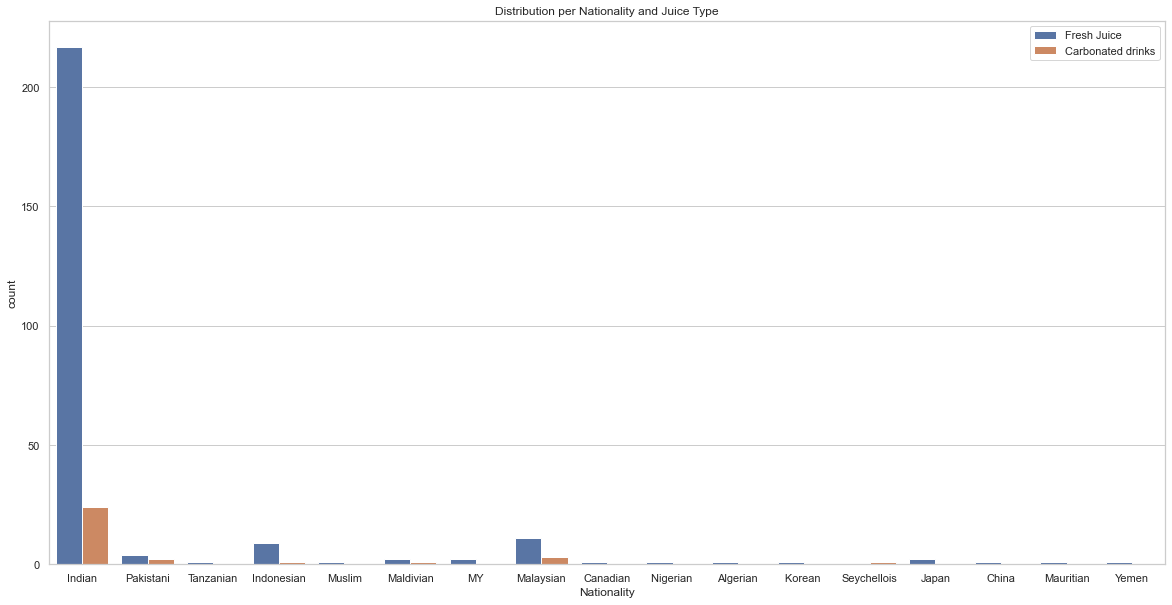

In [19]:
plt.figure(figsize=(20,10))
sns.countplot(x='Nationality', hue='Juice', data=df)
plt.legend(loc='upper right')
plt.title("Distribution per Nationality and Juice Type")

Text(0.5, 1.0, 'Distribution per Nationality and Dessert Preference')

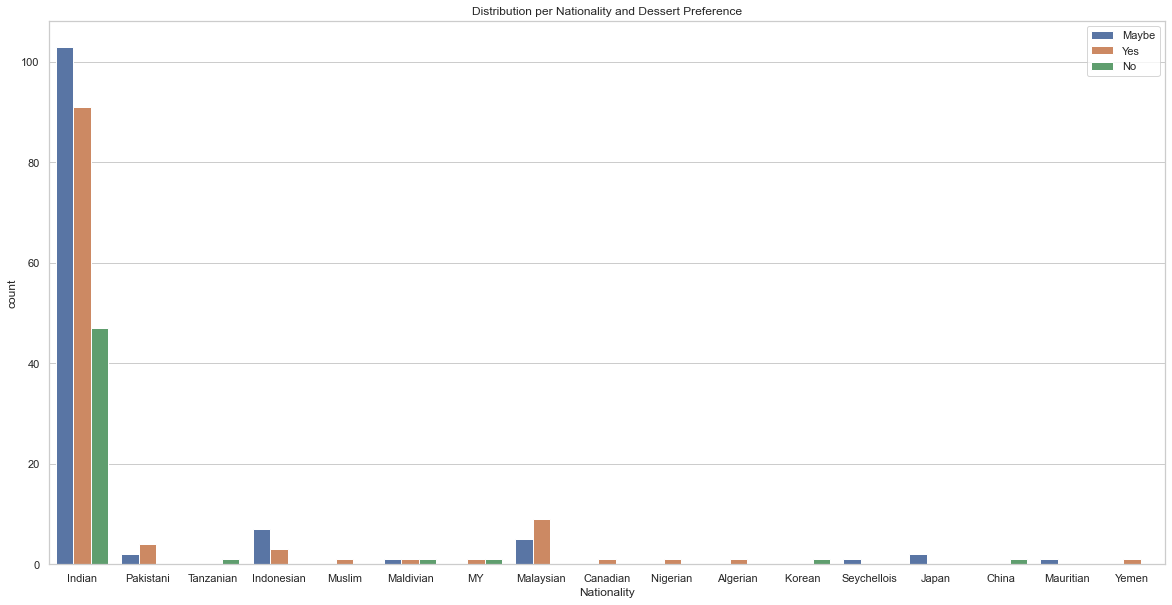

In [20]:
plt.figure(figsize=(20,10))
sns.countplot(x='Nationality', hue='Dessert', data=df)
plt.legend(loc='upper right')
plt.title("Distribution per Nationality and Dessert Preference")

If you remember at the beginning, I transformed the Timestapm column to a datetime format. So, to not let that action to waste, I wanted to have a look at what days of the week this forms were completed. I created also a month column but all of them were in the month of "May". 

In [31]:
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day_name()

Text(0.5, 1.0, 'Distribution per days')

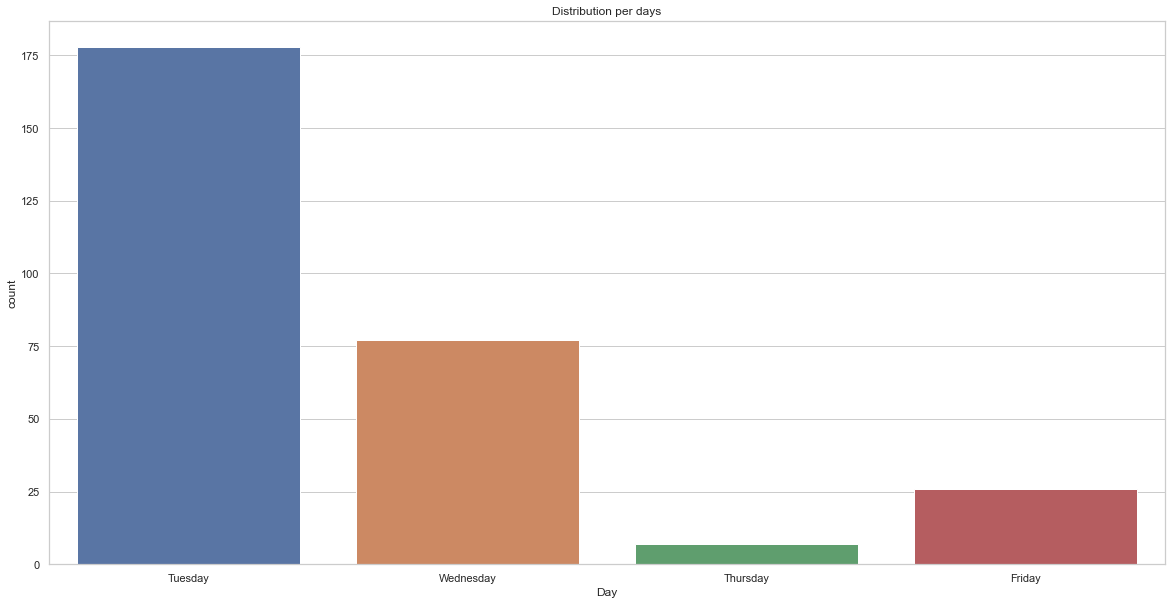

In [37]:
plt.figure(figsize=(20,10))
sns.countplot(x='Day', data=df)
plt.title("Distribution per days")

And that was it ! I just wanted to practice a bit of data cleaning and fast visualisation.    
__Thank you if you reached until here !__